In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Exercise 1:
Consider a cell-phone company that has thousands of customers and is interested in predicting the likelihood that specific customers will be churning in the next 3 months.

In [2]:
churn_history_matrix = pd.read_csv('features_churn_matrix_ex1.csv')
churn_history_matrix.head()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned
0,True,0.0,GRE,False,41.0,3.240370,False
1,True,1.0,ISR,False,29.0,2.121320,False
2,False,0.0,GRE,False,34.0,3.240370,False
3,False,1.0,ISR,False,29.0,3.240370,False
4,True,0.0,ISR,False,33.0,3.082207,False


In [3]:
churn_history_matrix["country"].value_counts()

GRE    25075
ISR    24925
Name: country, dtype: int64

In [4]:
churn_history_matrix["is_male"].value_counts()

True     25015
False    24985
Name: is_male, dtype: int64

In [5]:
churn_history_matrix["late_on_payment"].value_counts()

False    45059
True      4941
Name: late_on_payment, dtype: int64

In [6]:
churn_history_matrix["churned"].value_counts()

False    41954
True      8046
Name: churned, dtype: int64

In [7]:
churn_history_matrix["num_interactions_with_cust_service"].value_counts()

1.0     23635
0.0     23344
4.0      2930
9.0        90
16.0        1
Name: num_interactions_with_cust_service, dtype: int64

In [8]:
churn_history_matrix["Label"] = np.where(churn_history_matrix["churned"], 1, 0)

In [9]:
churn_history_matrix["country"] = np.where(churn_history_matrix["country"] == "ISR", 1, 0)

In [10]:
churn_history_matrix["is_male"] = np.where(churn_history_matrix["is_male"], 1, 0)

In [11]:
churn_history_matrix["late_on_payment"] = np.where(churn_history_matrix["late_on_payment"], 1, 0)

In [12]:
X = churn_history_matrix.drop(["Label", "churned"], axis = 1)

In [13]:
y = churn_history_matrix["Label"]

## 1A

Train a model to predict the likelihood of churning.

**Make sure to create a train/test split (with 20% test data).**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
norm_features = ['num_interactions_with_cust_service', 'age', 'years_in_contract']
mm_scaler = MinMaxScaler()

mm_scaler.fit(X_train[norm_features])
X_train[norm_features] = mm_scaler.transform(X_train[norm_features])
X_test[norm_features] = mm_scaler.transform(X_test[norm_features ])

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [16]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

In [17]:
y_pred = clf.predict(X_test)

## 1B
Print the confusion matrix

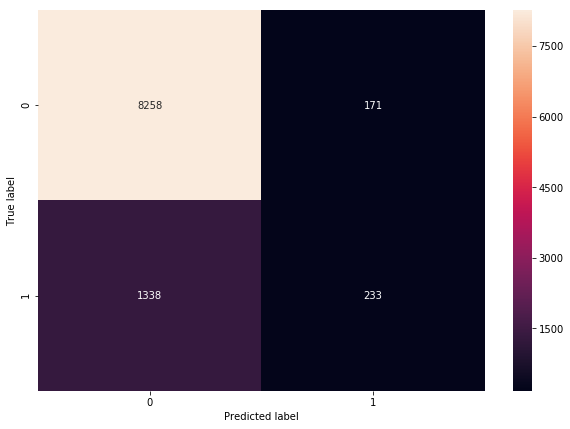

In [18]:
plt.figure(figsize=(10,7));
cm = confusion_matrix(y_test, y_pred);
ax = sns.heatmap(cm, annot=True, fmt="d");
plt.ylabel('True label');
plt.xlabel('Predicted label');

## 1C
What are the accuracy, ROC-AUC, and average precision of your model?

In [104]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

model_accuracy = clf.score(X_test, y_test)
model_precision = average_precision_score(y_test, y_probs[:,1], average='macro') 
model_roc_auc = roc_auc_score(y_test, y_pred, average='macro') 
print("model accuracy: {}".format(model_accuracy))
print("model average precision: {}".format(model_precision))
print("model ROC-AUC: {}".format(model_roc_auc))

model accuracy: 0.8491
model average precision: 0.4321174314729532
model ROC-AUC: 0.5640130361376289


## 1D
Display the AUC-ROC Curve and the PR Curve

In [31]:
from sklearn.metrics import roc_curve, auc

y_probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

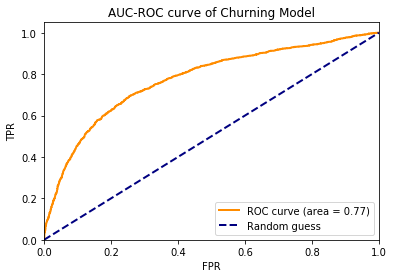

In [21]:
plt.title("AUC-ROC curve of Churning Model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], label = "Random guess", color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1])

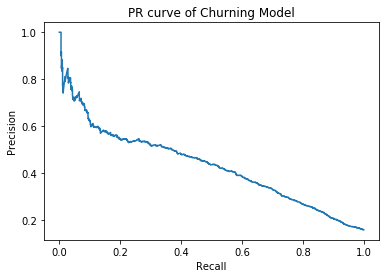

In [23]:
plt.plot(recall,precision);
plt.title("PR curve of Churning Model");
plt.xlabel("Recall");
plt.ylabel("Precision");

## 1E
What is the precision at the 0.1 recall level?

In [24]:
recall_lower = max(recall[recall<0.1])
recall_higher = min(recall[recall>=0.1])
precision_lower = precision[recall==recall_lower][0]
precision_higher = precision[recall==recall_higher][0]

In [25]:
from scipy import interp
precision_wanted = interp(0.1, [recall_lower, recall_higher], [precision_lower, precision_higher])
print("Precision at Recall=0.1: {}".format(precision_wanted))

Precision at Recall=0.1: 0.6251529315807636


## 1F
How would you describe the accuracy of your model to your boss in 1 minute?
Please write down a sentence or two explaining why you picked that metric.

The Accuracy metric can be largely contributed by a large number of TN which in most business circumstances, we do not focus on much, whereas False Negative and False Positive usually has business costs (tangible & intangible). In our case I expect a high number of Actual Negatives because usually not that many people want to churn out of a contract unless it is a terrible business model or some event happens which leads to a high churn rate. Thus F1 Score is a better measure to use than Accuracy since we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives). We also have no context yet to minimize False Positives vs False Negatives, so We cannot choose Precision or Recall.

Therefore I would show him how high my F1 score is to sell how good my model is.

## 1G
The Director of Marketing wants this model because they want to give a discount voucher to customers that are at risk of leaving. Previous research has concluced that giving these vouchers to the 5% of customers that are at most risk of churn is optimal. 

How would you present your metric with this new information? How would you explain to the Director of Marketing that your model can help in this campaign?

Please write down one sentence describing why you picked this metric.

This would mean that I would need to minimize the false positive rate because I do not want to give vouchers to people that will not churn. This changes the whole problem. I would choose precision and would show to my boss that it has a high precision which would give him confidence to hand out the vouchers while minimizing the amount of money lost handing out vouchers to people that would not have churned. 

In [86]:
voucher_qty = int(len(y_probs)*0.05)
voucher_cutoff = np.partition(y_probs[:,1], -voucher_qty)[-voucher_qty]

In [92]:
y_pred_vouch = np.where(y_probs[:,1]>=voucher_cutoff, 1, 0)

In [105]:
from sklearn.metrics import precision_score
voucher_precision = precision_score(y_test, y_pred_vouch, average='macro') 
print("Dear Boss, {} of the vouchers would be given to people that will churn. This is very good precision.".format(voucher_precision))

Dear Boss, 0.7125372373476019 of the vouchers would be given to people that will churn. This is very good precision.


## 1H
The CFO just heard that you have this awesome new model trained and ready to roll!  Sadly, she couldn't care less about those coupons.

Instead, she would like to accurately predict the probabily that each customer will be churning so that the Finance team can accurately calculate revenue projections across many cohorts of users.

How would you present your metric with this new information? How would you explain to the CFO that your model can help in this campaign? Please write down one sentence describing why you picked this metric.

The goal here is to accurately predict the revenue so we would need to use the Accuracy metric as there is no need here to focus on false negatives or false positives. We are only interested in getting as close as possible to the revenue projection.

Therefore I would present to the CFO how high my Accuracy is.

NOTE: From another perspective, that of overestimating the churn rate to be on the safe side in projecting revenues, then the Recall may be a better metric here. In this type of business it is better to be safe than sorry and capture more actual positives even at the cost of some false positives. This way we do not have any shortcomings at the end of the year after overestimating revenue projections. We are better off underestimating them.